In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

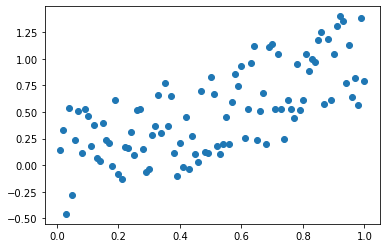

In [3]:
n = 100
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 1, n)  + np.random.rand(n) - .5


plt.scatter(x,y)

In [8]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [9]:
model.coef_, model.intercept_

(array([0.96635741]), 0.008706464761738086)

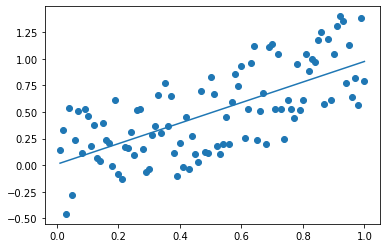

In [10]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

## How do we "test" this model on "new" data if we don't have a new dataset?

### Instead of using all of our data to produce this model, let's use some, and save the rest as a reserve 

In [23]:
model = LinearRegression()
model.fit(x[:50], y[:50])
model.coef_, model.intercept_

(array([1.54273745]), -0.19443987547002758)

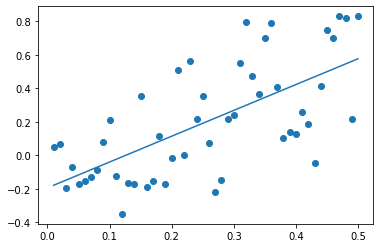

In [24]:
plt.scatter(x[:50],y[:50])
plt.plot(x[:50], np.dot(x[:50], model.coef_) + model.intercept_)

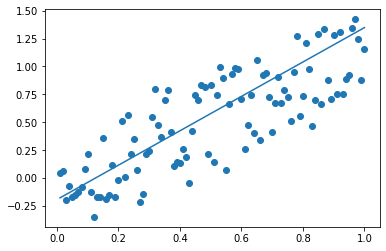

In [25]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

## Our slope doesn't match the previous slope with all the data. Why not? 
## Let's plot all of our data with this model to see

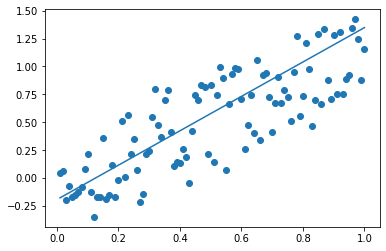

In [26]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

## We only used the first half of our data and neglected the second half. 

### Let's try this again differently. Let's shuffle our data first

In [27]:
def shuffle(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return p

In [30]:
p = shuffle(x, y)

In [31]:
p

array([ 5, 49, 21, 97, 72, 47, 63, 59, 34, 15, 30, 43, 66, 61,  1, 71, 82,
        6, 24, 91, 73, 86, 83, 48, 38, 44, 20, 78, 77, 41, 18, 70, 17, 85,
        2, 64, 84, 98, 35, 74, 33, 88, 28, 68, 76, 32, 56, 87, 57,  8, 58,
       36,  7, 67, 22, 11, 90, 25, 12, 80, 29,  0, 99, 13, 89,  9, 50, 45,
        3, 81, 75, 54, 62, 23, 95, 55, 46, 39, 42,  4, 92, 94, 19, 96, 69,
       14, 26, 53, 52, 51, 65, 27, 37, 79, 40, 16, 93, 60, 10, 31])

In [35]:
x[[2, 0, 1, 4]]

array([[0.03],
       [0.01],
       [0.02],
       [0.05]])

In [36]:
x[[61, 27, 92]], y[[61, 27, 92]]

(array([[0.62],
        [0.28],
        [0.93]]),
 array([ 0.47725105, -0.14615383,  0.74931497]))

In [34]:
x[p], y[p]

(array([[0.06],
        [0.5 ],
        [0.22],
        [0.98],
        [0.73],
        [0.48],
        [0.64],
        [0.6 ],
        [0.35],
        [0.16],
        [0.31],
        [0.44],
        [0.67],
        [0.62],
        [0.02],
        [0.72],
        [0.83],
        [0.07],
        [0.25],
        [0.92],
        [0.74],
        [0.87],
        [0.84],
        [0.49],
        [0.39],
        [0.45],
        [0.21],
        [0.79],
        [0.78],
        [0.42],
        [0.19],
        [0.71],
        [0.18],
        [0.86],
        [0.03],
        [0.65],
        [0.85],
        [0.99],
        [0.36],
        [0.75],
        [0.34],
        [0.89],
        [0.29],
        [0.69],
        [0.77],
        [0.33],
        [0.57],
        [0.88],
        [0.58],
        [0.09],
        [0.59],
        [0.37],
        [0.08],
        [0.68],
        [0.23],
        [0.12],
        [0.91],
        [0.26],
        [0.13],
        [0.81],
        [0.3 ],
        [0.01],
        

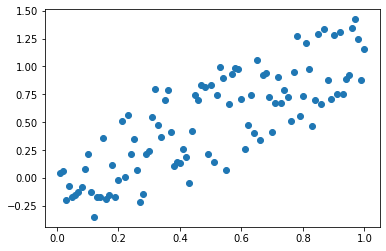

In [37]:
plt.scatter(x[p],y[p])

### Still plots the same scatter plot

### So, let's use the first 50 points of the shuffled data instead and see if the model is similar 

In [39]:
model = LinearRegression()
model.fit(x[p][:50], y[p][:50])
model.coef_, model.intercept_


(array([1.19849301]), -0.05733592566927537)

### Success! We got a similar slope as before with half of the points 

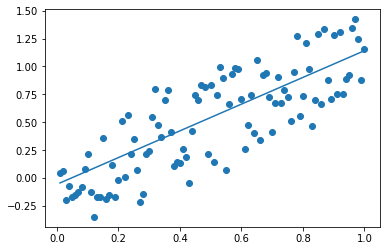

In [40]:

plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

###  So how do we check the validity of the model on the rest of the points? The loss (Error) function of course!
### $E = \Sigma err(y - \hat{y}) = \Sigma err(y - \beta \cdot x)$

### $E = \frac{1}{N}\Sigma err( y - \hat{y}) = \frac{1}{N}\Sigma err(y - \beta \cdot x)$
### Why divide by N? 
This way we have a _mean_ error that's invariant to the number of points you use to build your model. Otherwise, your error would increase with the number of points

In [52]:
x[50:]

array([[ 0.51],
       [ 0.52],
       [ 0.53],
       [ 0.54],
       [ 0.55],
       [ 0.56],
       [ 0.57],
       [ 0.58],
       [ 0.59],
       [ 0.6 ],
       [ 0.61],
       [ 0.62],
       [ 0.63],
       [ 0.64],
       [ 0.65],
       [ 0.66],
       [ 0.67],
       [ 0.68],
       [ 0.69],
       [ 0.7 ],
       [ 0.71],
       [ 0.72],
       [ 0.73],
       [ 0.74],
       [ 0.75],
       [ 0.76],
       [ 0.77],
       [ 0.78],
       [ 0.79],
       [ 0.8 ],
       [ 0.81],
       [ 0.82],
       [ 0.83],
       [ 0.84],
       [ 0.85],
       [ 0.86],
       [ 0.87],
       [ 0.88],
       [ 0.89],
       [ 0.9 ],
       [ 0.91],
       [ 0.92],
       [ 0.93],
       [ 0.94],
       [ 0.95],
       [ 0.96],
       [ 0.97],
       [ 0.98],
       [ 0.99],
       [ 1.  ]])

In [41]:
np.dot(x[50:], model.coef_) + model.intercept_

array([0.55389551, 0.56588044, 0.57786537, 0.5898503 , 0.60183523,
       0.61382016, 0.62580509, 0.63779002, 0.64977495, 0.66175988,
       0.67374481, 0.68572974, 0.69771467, 0.7096996 , 0.72168453,
       0.73366946, 0.74565439, 0.75763932, 0.76962425, 0.78160918,
       0.79359411, 0.80557904, 0.81756397, 0.8295489 , 0.84153383,
       0.85351876, 0.86550369, 0.87748862, 0.88947355, 0.90145848,
       0.91344341, 0.92542834, 0.93741327, 0.94939821, 0.96138314,
       0.97336807, 0.985353  , 0.99733793, 1.00932286, 1.02130779,
       1.03329272, 1.04527765, 1.05726258, 1.06924751, 1.08123244,
       1.09321737, 1.1052023 , 1.11718723, 1.12917216, 1.14115709])

In [42]:
y[50:] - (np.dot(x[50:], model.coef_) + model.intercept_)

array([-0.41294502,  0.1737528 ,  0.41488509,  0.30546697, -0.53415129,
        0.04634507,  0.30881455,  0.34603125,  0.32776898,  0.04686728,
       -0.41735776, -0.2084787 ,  0.04176207, -0.31047507,  0.33925166,
       -0.39022493,  0.17915811,  0.18651926, -0.04429179, -0.37316216,
       -0.11979849,  0.10043697, -0.14930504, -0.04046237, -0.11442381,
       -0.34336111,  0.081676  ,  0.39268163, -0.33044365, -0.16261886,
        0.29968472,  0.05581227, -0.47455317, -0.25426166,  0.33118242,
       -0.31462076,  0.35184721, -0.12125057, -0.30109668,  0.26365534,
       -0.27886136,  0.26212352, -0.3079476 , -0.1804702 , -0.15530111,
        0.25471418,  0.31822227,  0.13076705, -0.25466923,  0.01669265])

In [43]:
np.square(y[50:] - (np.dot(x[50:], model.coef_) + model.intercept_))

array([1.70523590e-01, 3.01900357e-02, 1.72129640e-01, 9.33100710e-02,
       2.85317596e-01, 2.14786553e-03, 9.53664294e-02, 1.19737625e-01,
       1.07432507e-01, 2.19654240e-03, 1.74187499e-01, 4.34633665e-02,
       1.74407045e-03, 9.63947697e-02, 1.15091687e-01, 1.52275499e-01,
       3.20976277e-02, 3.47894333e-02, 1.96176228e-03, 1.39249995e-01,
       1.43516775e-02, 1.00875857e-02, 2.22919958e-02, 1.63720360e-03,
       1.30928078e-02, 1.17896852e-01, 6.67096838e-03, 1.54198864e-01,
       1.09193007e-01, 2.64448947e-02, 8.98109336e-02, 3.11500940e-03,
       2.25200708e-01, 6.46489898e-02, 1.09681798e-01, 9.89862234e-02,
       1.23796458e-01, 1.47017007e-02, 9.06592092e-02, 6.95141398e-02,
       7.77636601e-02, 6.87087385e-02, 9.48317261e-02, 3.25694919e-02,
       2.41184361e-02, 6.48793138e-02, 1.01265411e-01, 1.71000211e-02,
       6.48564166e-02, 2.78644427e-04])

In [44]:
np.sum(np.square(y[50:] - (np.dot(x[50:], model.coef_) + model.intercept_)))

3.78196049931454

In [45]:
np.sum(np.square(y[p][50:] - (np.dot(x[p][50:], model.coef_) + model.intercept_)))/50

0.08216705397163933

### Is there a shorter way of calculating this error?
Why yes, of course! Scikit-Learn to the rescue

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
mean_squared_error(y[p][50:], np.dot(x[p][50:], model.coef_) + model.intercept_)

0.07687213114183009

### Why the slight discrepancy in values? 
Let's check the Documentation
[http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error]

Turns out sklearn sums N-1 values and not all N because Statistics
[http://stats.stackexchange.com/questions/17890/what-is-the-difference-between-n-and-n-1-in-calculating-population-variance]

## Is there an easier way to shuffle the data?
I'm glad you asked [http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html]

In [48]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)

In [56]:
from sklearn.linear_model import Ridge

In [57]:
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([1.12871644]), -0.041190179833288876)

In [58]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([1.3608476]), -0.16022704175985647)

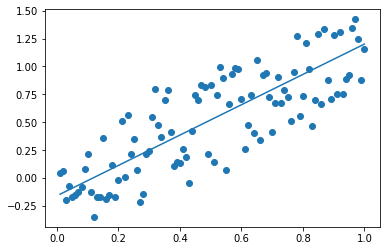

In [59]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

In [60]:
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

0.076453013359516

In [61]:
mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.06487560107609029

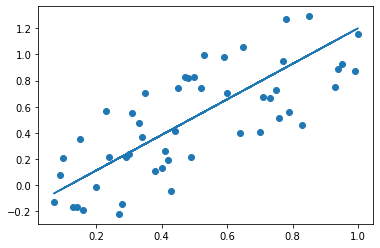

In [62]:
plt.scatter(x_test,y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_)

## Ridge 

In [69]:
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

0.069445955321577324

In [70]:
mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

0.079800371048118851